In [1]:
#COVID_DETECTION_(B JAYANTH KUMAR)

In [32]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [34]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [35]:
# data_gen=image_dataset_from_directory(color_mode='grayscale',labels='inferred',labels='categorical'batch_size=32,)

In [36]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
image_path="C:/Users/LENOVO/Desktop/CNN_Covid19/CNN_Covid19/Train/Lung_Opacity/Lung_Opacity-1.png"

In [38]:
img=load_img(str(image_path))
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x14037EAC880>


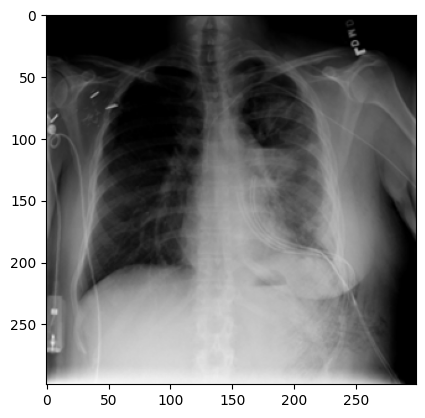

In [39]:
plt.imshow(img)

In [40]:
image_data=img_to_array(img)
print(image_data)
print(image_data.shape)

[[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[193. 193. 193.]
  [196. 196. 196.]
  [201. 201. 201.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[214. 214. 214.]
  [219. 219. 219.]
  [222. 222. 222.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  1.   1.   1.]]

 [[238. 238. 238.]
  [240. 240. 240.]
  [241. 241. 241.]
  ...
  [  0.   0.   0.]
  [  2.   2.   2.]
  [  4.   4.   4.]]]
(299, 299, 3)


In [41]:
image_data=np.expand_dims(image_data,axis=0)

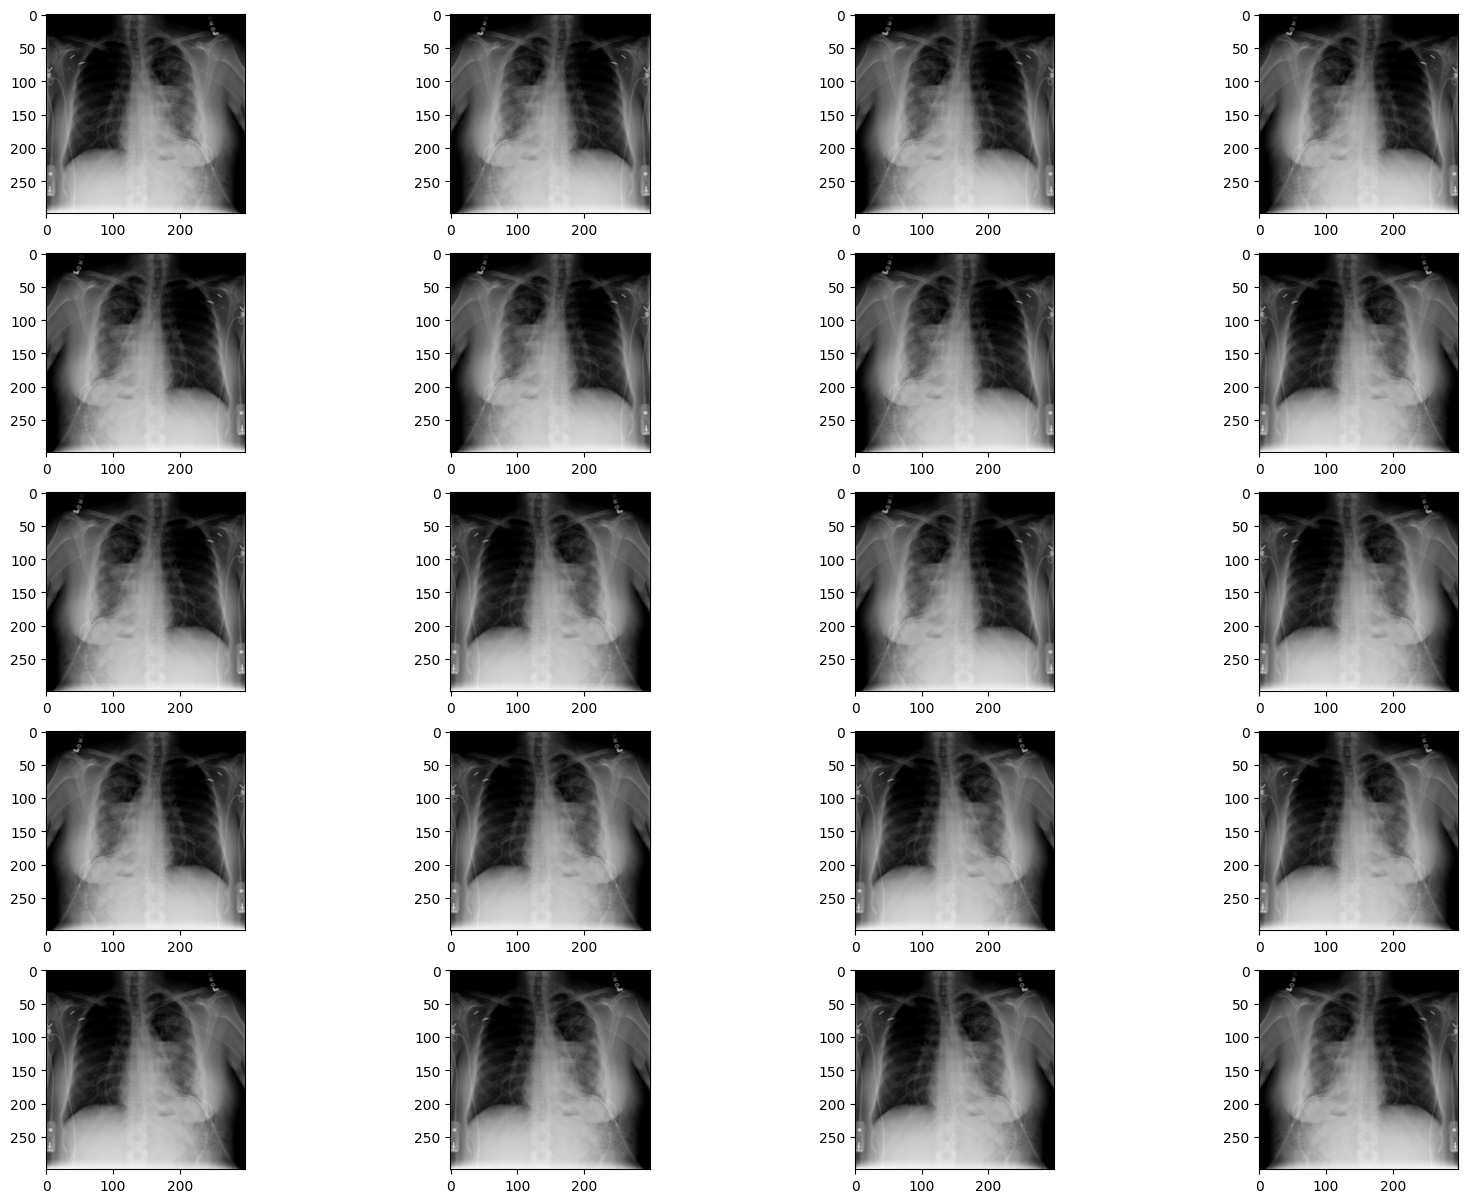

In [42]:

datagen=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen.flow(image_data,batch_size=1)
rows=5
columns=4
fig,axes = plt.subplots(rows,columns)
for r in range(rows):
        for c in range(columns):
            image_batch=train_generator.next()
            image=image_batch[0].astype('uint8')
            axes[r,c].imshow(image)
fig.set_size_inches(20,15)

In [43]:
img_transform=next(train_generator)
img_transform

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [201., 201., 201.],
         [196., 196., 196.],
         [193., 193., 193.]],

        [[  1.,   1.,   1.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [222., 222., 222.],
         [219., 219., 219.],
         [214., 214., 214.]],

        [[  4.,   4.,   4.],
       

In [44]:
img_transform=img_transform.astype('uint8')
img_transform

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [201, 201, 201],
         [196, 196, 196],
         [193, 193, 193]],

        [[  1,   1,   1],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [222, 222, 222],
         [219, 219, 219],
         [214, 214, 214]],

        [[  4,   4,   4],
         [  2,   2,   2],
         [  0,   0,   0],
         ...,
         [241, 241, 241],
        

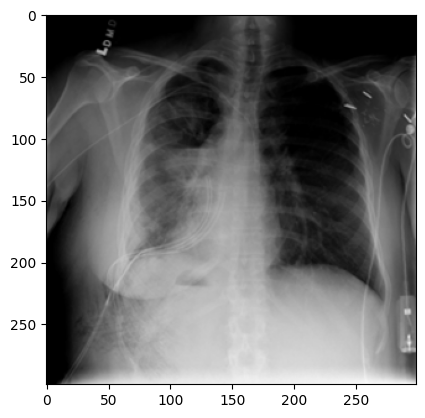

In [45]:
plt.imshow(img_transform[0])

In [46]:
image_data[0][0][0]

array([0., 0., 0.], dtype=float32)

In [47]:
input_size=(224,224,3)
input_size[:-1]

(224, 224)

In [48]:
batch_size=32
input_size=(75,75,3)
datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,rotation_range=50,horizontal_flip=True,brightness_range=[0.15,1.5])
train_generator=datagen.flow_from_directory('C:/Users/LENOVO/Desktop/CNN_Covid19/CNN_Covid19/Train',target_size=input_size[:-1],color_mode='rgb',shuffle=True,batch_size=batch_size,class_mode='categorical')
class_dictionary=train_generator.class_indices
class_list=np.array(list(class_dictionary.keys()),dtype='object')


Found 13749 images belonging to 4 classes.


In [49]:
z=next(train_generator)

In [50]:
z[0].shape

(32, 75, 75, 3)

In [51]:
z[1][0]

array([0., 1., 0., 0.], dtype=float32)

In [52]:
val_gen=ImageDataGenerator(rescale=1./255)
val_set=val_gen.flow_from_directory('C:/Users/LENOVO/Desktop/CNN_Covid19/CNN_Covid19/Validation',target_size=input_size[:-1],color_mode='rgb')

Found 3756 images belonging to 4 classes.


In [53]:
val_images,val_labels=next(val_set)

In [54]:
val_images.shape

(32, 75, 75, 3)

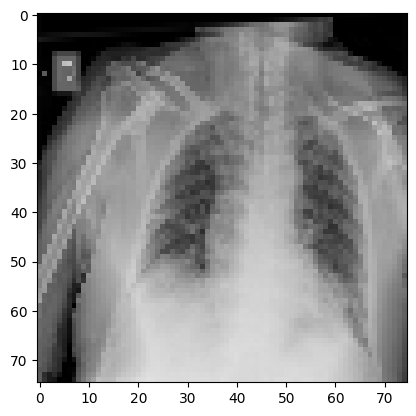

In [55]:
plt.imshow(val_images[1])

In [56]:
val_gen=ImageDataGenerator(rescale=1./255)
test=val_gen.flow_from_directory('C:/Users/LENOVO/Desktop/CNN_Covid19/CNN_Covid19/Test',target_size=input_size[:-1],color_mode='rgb',batch_size=64)

Found 3739 images belonging to 4 classes.


In [57]:
test

# Model Generation


In [58]:
model=models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=[64,64,3]))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(layers.MaxPool2D(pool_size=2,strides=2))
model.add(layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=4,activation='softmax'))

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [60]:
model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy'])

## Training

In [61]:
# model.fit(train_generator,validation_data=val_set,epochs=16,batch_size=32)

## pretrained model vgg16

In [62]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
#---number of fruits---
NO_CLASSES = max(train_generator.class_indices.values()) + 1
#---load the VGG16 model as the base model for training---
base_model = VGG16(include_top=False, input_shape=input_size)
#---add our own layers---
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)       # add dense layers so
# that the model can
# learn more complex
# functions and
# classify for better
# results.
x = Dense(1024,activation='relu')(x)       # dense layer 2
x = Dense(512,activation='relu')(x)        # dense layer 3
preds = Dense(NO_CLASSES,
              activation='softmax')(x)     # final layer with
# softmax activation
#---create a new model with the base model's original
# input and the new model's output---
model2 = Model(inputs = base_model.input, outputs = preds)
# ---don't train the first 19 layers - 0..18---
for layer in model2.layers[:19]:
    layer.trainable=False
#---train the rest of the layers - 19 onwards---
for layer in model2.layers[19:]:
    layer.trainable=True
#
# #---compile the model---
model2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch=train_generator.n//train_generator.batch_size
model2.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=15,validation_data=val_set)

Epoch 1/15
429/429 [==============================] - 638s 1s/step - loss: 0.9336 - accuracy: 0.6023 - val_loss: 0.6989 - val_accuracy: 0.7183
Epoch 2/15
429/429 [==============================] - 619s 1s/step - loss: 0.7901 - accuracy: 0.6757 - val_loss: 0.6477 - val_accuracy: 0.7362
Epoch 3/15
429/429 [==============================] - 740s 2s/step - loss: 0.7475 - accuracy: 0.6922 - val_loss: 0.6883 - val_accuracy: 0.7324
Epoch 4/15
429/429 [==============================] - 806s 2s/step - loss: 0.7380 - accuracy: 0.6988 - val_loss: 0.6442 - val_accuracy: 0.7495
Epoch 5/15
429/429 [==============================] - 635s 1s/step - loss: 0.7242 - accuracy: 0.7114 - val_loss: 0.6033 - val_accuracy: 0.7585
Epoch 6/15
429/429 [==============================] - 626s 1s/step - loss: 0.7191 - accuracy: 0.7089 - val_loss: 0.5897 - val_accuracy: 0.7721
Epoch 7/15
429/429 [==============================] - 623s 1s/step - loss: 0.7026 - accuracy: 0.7171 - val_loss: 0.6310 - val_accuracy: 0.7444

In [63]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', input_shape=input_size,include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(NO_CLASSES, activation='softmax')(x)

# this is the model we will train
model3 = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model3.summary()
# train the model on the new data for a few epochs
model3.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=13,validation_data=val_set)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model3.layers[:249]:
    layer.trainable = False
for layer in model3.layers[249:]:
    layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model3.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model3.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=8,validation_data=val_set)

87910968/87910968 [==============================] - 7s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 37, 37, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d_6[0][0]']               
 alization)                                                                                       
                                                                                                  
 activation (Activation)   

                                                                                                  
 batch_normalization_10 (BatchN  (None, 7, 7, 96)    288         ['conv2d_16[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 7, 7, 32)    96          ['conv2d_17[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 7, 7, 64)     0           ['batch_normalization_7[0][0]']  
          

                                                                                                  
 conv2d_26 (Conv2D)             (None, 7, 7, 48)     13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_29 (Conv2D)             (None, 7, 7, 96)     55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 7, 7, 48)    144         ['conv2d_26[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 7, 7, 96)    288         ['conv2d_29[0][0]']              
 ormalization)                                                                                    
          

                                                                  'max_pooling2d_8[0][0]']        
                                                                                                  
 conv2d_40 (Conv2D)             (None, 3, 3, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 3, 3, 128)   384         ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 3, 3, 128)    114688      ['activation_34[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 3, 3, 160)   480         ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_45[0][0]'] 
          

                                                                                                  
 batch_normalization_55 (BatchN  (None, 3, 3, 160)   480         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 3, 3, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_57 (Conv2D)             (None, 3, 3, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_62 (Conv2D)             (None, 3, 3, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_67 (Conv2D)             (None, 3, 3, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_72 (Conv2D)             (None, 3, 3, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 3, 3, 192)   576         ['conv2d_67[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 3, 3, 192)   576         ['conv2d_72[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_70 (BatchN  (None, 3, 3, 192)   576         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 3, 3, 192)   576         ['conv2d_80[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 3, 3, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_77

 activation_79 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_90[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
          

 batch_normalization_93 (BatchN  (None, 1, 1, 192)   576         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
          

C:\Users\LENOVO\.conda\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/8
429/429 [==============================] - 249s 551ms/step - loss: 1.6845 - val_loss: 0.9389
Epoch 2/8
429/429 [==============================] - 235s 547ms/step - loss: 0.8768 - val_loss: 0.7738
Epoch 3/8
429/429 [==============================] - 236s 550ms/step - loss: 0.7995 - val_loss: 0.7542
Epoch 4/8
429/429 [==============================] - 234s 545ms/step - loss: 0.7392 - val_loss: 0.6994
Epoch 5/8
429/429 [==============================] - 234s 546ms/step - loss: 0.7198 - val_loss: 0.6706
Epoch 6/8
429/429 [==============================] - 235s 546ms/step - loss: 0.6932 - val_loss: 0.6996
Epoch 7/8
429/429 [==============================] - 234s 544ms/step - loss: 0.6884 - val_loss: 0.6792
Epoch 8/8
429/429 [==============================] - 239s 556ms/step - loss: 0.6607 - val_loss: 0.6605


In [64]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 75, 75, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 37, 37, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 37, 37, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 37, 37, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 18, 128)       0   

In [65]:
arr=np.array([[10,1,2,3,4,5]])
print(arr.shape)
arr1=np.expand_dims(arr,axis=0)
print(arr1.shape)


(1, 6)
(1, 1, 6)


In [66]:
model3.evaluate(test)

59/59 [==============================] - 76s 1s/step - loss: 0.6660


0.6659510731697083

In [67]:
test_sample, test_labels = next(test)

In [68]:
test_sample.shape

(64, 75, 75, 3)

In [70]:
y_pred=model3.predict(test_sample)

2/2 [==============================] - 3s 196ms/step


In [71]:
y_pred.shape

(64, 4)

In [72]:
print(train_generator.class_indices)

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


In [73]:
predict_labels=[]
labels=['Covid','Lung_Opacity',"Normal","Virual Pneumonia"]
for i in range(len(y_pred)):
    z=y_pred[i].argmax()
    predict_labels.append(labels[z])
    

In [74]:
predict_labels

['Lung_Opacity',
 'Normal',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Virual Pneumonia',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Virual Pneumonia',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Virual Pneumonia',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Virual Pneumonia',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Virual Pneumonia',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Normal']

In [76]:
scores=model3.evaluate(test)

59/59 [==============================] - 65s 1s/step - loss: 0.6660


In [79]:
print("test_accuracy : ")
print(scores*100)

test_accuracy : 
66.59508943557739


In [80]:
import PIL
import numpy as np

In [81]:
img_data=np.random.random(size=(64,64,3))

In [82]:
img_data.shape

(64, 64, 3)

In [83]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array,load_img

In [84]:
img=load_img('C:/Users/LENOVO/Desktop/CNN_Covid19/CNN_Covid19/Test/COVID/COVID-3121.png',color_mode='rgb',target_size=(64,64))

img_1=img_to_array(img)
test_img=np.expand_dims(img_1,axis=0)

In [85]:
test_img.shape

(1, 64, 64, 3)

In [137]:
model.predict(test_img)

1/1 [==============================] - 0s 26ms/step


array([[4.2918056e-24, 2.5597146e-06, 1.3140898e-09, 9.9999750e-01]],
      dtype=float32)

In [90]:
np.argmax(model.predict(test_img))

1/1 [==============================] - 0s 38ms/step


3

In [93]:
img=load_img('C:/Users/LENOVO/Desktop/CNN_Covid19/CNN_Covid19/Test/Normal/Normal-8271.png',color_mode='rgb',target_size=(64,64))

img_1=img_to_array(img)
test_img=np.expand_dims(img_1,axis=0)

In [94]:
test_img.shape

(1, 64, 64, 3)

In [139]:
x=model.predict(test_img)

1/1 [==============================] - 0s 42ms/step


In [141]:
x

array([[4.2918056e-24, 2.5597146e-06, 1.3140898e-09, 9.9999750e-01]],
      dtype=float32)